In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as img
from os import listdir
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In C:\Users\nachi.DESKTOP-NT2DQ0M\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\nachi.DESKTOP-NT2DQ0M\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\nachi.DESKTOP-NT2DQ0M\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\nachi.DESKTOP-NT2DQ0M\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\nachi.DESKTOP-NT2DQ0M\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will b

# Initiating and Compiling the Model (AlexNet)

In [3]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96,(11,11),strides=4,activation='relu',input_shape=(227,227,3)),
    tf.keras.layers.MaxPooling2D((3,3),strides=2),
    tf.keras.layers.Conv2D(256,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3),strides=2),
    tf.keras.layers.Conv2D(384,(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((3,3),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(9216,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [4]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Load the images

In [5]:
#Load Data
dog_img=[]
cat_img=[]
dog_add='address'
cat_add='address'
add=[dog_add,cat_add]
for i in add:
    for filename in listdir(i):
        image_data=img.imread(i + '/' + filename)
        if i==dog_add:
            dog_img.append(image_data)
        else:
            cat_img.append(image_data)
img_labels=[0]*len(dog_img)+[1]*len(cat_img)
all_img=dog_img + cat_img
labels={0:"Dog" , 1:"Cat"}

In [26]:
from PIL import Image
all_img_1=[]
size=(0,0,227,227)
for f in range(len(all_img)):
    a=Image.fromarray(all_img[f])
    b=a.crop(size)
    all_img_1.append(b)

import numpy as np
data=[]
for i in range(len(all_img_1)):
    d=np.array(all_img_1[i])
    data.append(d)

# Split the images into training and test set

In [6]:
X_train,X_test,y_train,y_test=train_test_split(all_img[:4000],img_labels[:4000],test_size=0.5)

# Converting train and test set into numpy array

In [29]:
import numpy as np
len(X_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

(2000, 227, 227, 3)

# Saving the model 

In [30]:
# latest model will be saved after each epoch when training

import os

model_path='address where model is to be saved'

model_dir=os.path.dirname(model_path)

model_callback=tf.keras.callbacks.ModelCheckpoint(model_path,save_weights_only=True,verbose=1)

# Training the model

In [ ]:
fitting=model.fit(X_train,y_train,epochs=200,validation_split=0.25,batch_size=100,steps_per_epoch=15,shuffle=True,use_multiprocessing=True,callbacks=[model_callback])

Train on 1500 samples, validate on 500 samples
Epoch 1/200
1400/1500 [===========================>..] - ETA: 4s - loss: 0.9243 - accuracy: 0.4743
Epoch 00001: saving model to D:\Project\My_Code\AlexNet
1500/1500 [==============================] - 95s 63ms/sample - loss: 0.9198 - accuracy: 0.4713 - val_loss: 0.9014 - val_accuracy: 0.4260
Epoch 2/200
1400/1500 [===========================>..] - ETA: 4s - loss: 0.9207 - accuracy: 0.4986
Epoch 00002: saving model to D:\Project\My_Code\AlexNet
1500/1500 [==============================] - 94s 63ms/sample - loss: 0.9208 - accuracy: 0.4960 - val_loss: 0.8952 - val_accuracy: 0.5140
Epoch 3/200
1400/1500 [===========================>..] - ETA: 4s - loss: 0.9213 - accuracy: 0.5043
Epoch 00003: saving model to D:\Project\My_Code\AlexNet
1500/1500 [==============================] - 95s 63ms/sample - loss: 0.9222 - accuracy: 0.5027 - val_loss: 0.8923 - val_accuracy: 0.5140
Epoch 4/200
1400/1500 [===========================>..] - ETA: 4s - loss: 0.93

# Loading pre-trained weights

In [16]:
model.load_weights(model_path)

AttributeError: 'dict' object has no attribute 'endswith'

# Testing the model

In [13]:
model.evaluate(X_test,y_test,batch_size=100,use_multiprocessing=True)

2000/2000 [==============================] - 42s 21ms/sample - loss: 1.0484 - accuracy: 0.6015


[1.048373094201088, 0.6015]

# Plotting training and validation error

In [9]:
from tensorflow.keras.optimizers import Adam
epochs = 50
learning_rate = 0.0005
decay_rate = learning_rate / epochs
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

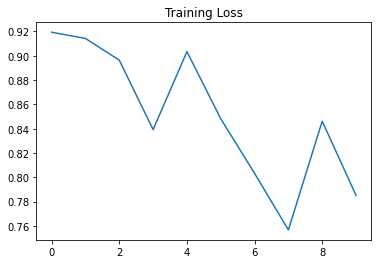

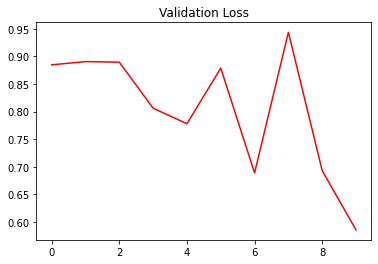

In [46]:
import matplotlib.pyplot as plt
val_loss = new_fitting.history['val_loss']
loss = new_fitting.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)
plt.title("Training Loss")
plt.show()
plt.plot(epochs,val_loss,'r')
plt.title("Validation Loss")
plt.show()